In [ ]:
# A University Announced Its On-Campus Placement Records For The Engineering Course. The Data Is From The Years 2013 And 2014.
# The Following Is The College Placements Data Compiled Over 2 years. Use This Data To Predict And Analyse Whether A Student Gets Placed, Based On His/Her Background.
# Perform Extensive EDAs And Bring Out Insights.
# Build A Robust Model Using ML Techniques Or Neural Networks. Use Multiple Algorithms.

In [1]:
#Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('collegePlace.csv')
df.info()
# There is no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [3]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.shape

(2966, 8)

In [5]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.shape)

1829
(1137, 8)


In [6]:
x=list(df.columns)
print(x)

['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']


In [7]:
def count_plot(x):
    plt.figure(figsize=(15,20))
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    
    for i in range(1,len(x)):
        plt.subplot(2,4,i)
        plt.xticks(rotation = 90)
        sns.countplot(df[x[i]])     

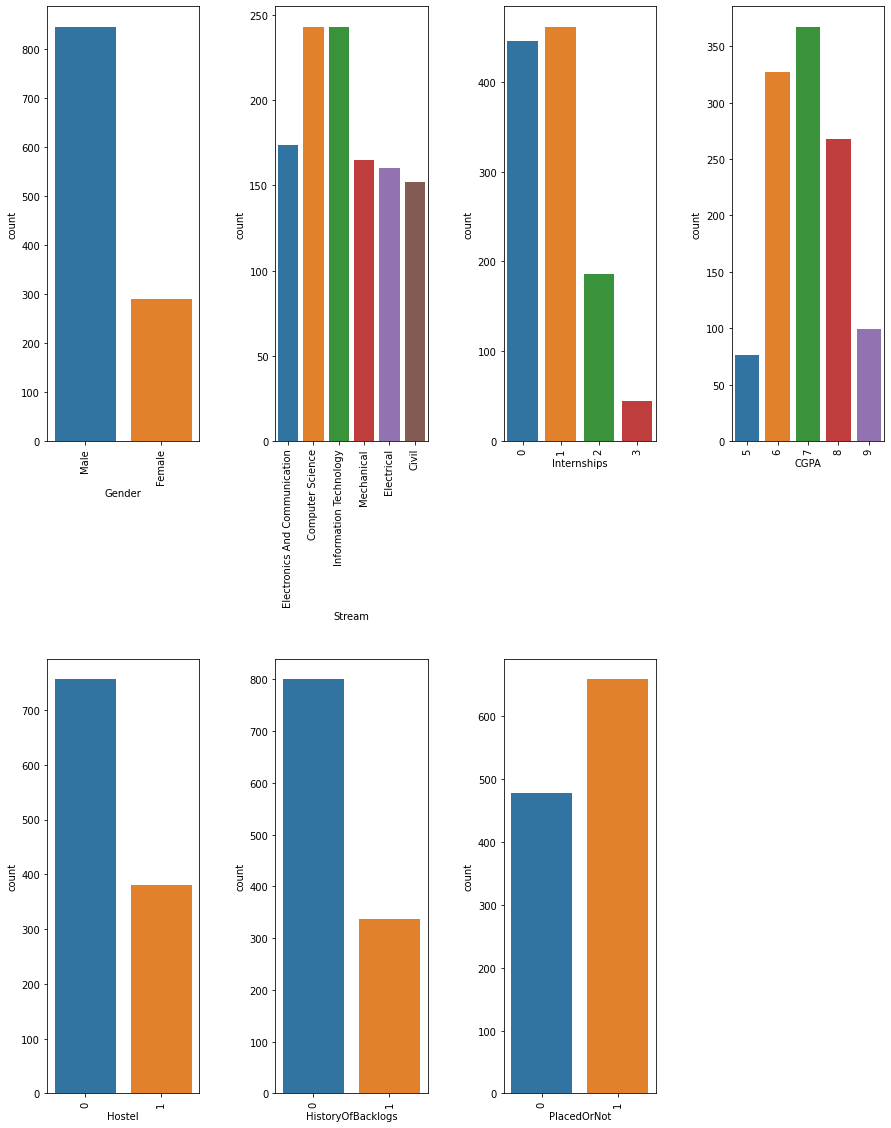

In [8]:
count_plot(x)

In [ ]:
# There are approx.  male and  females for different stream

# Highest number of students approx  have shown intreset for Computer scinece stream 
# followed by Information technology  and least students are intrested for Civil Engineering 

# Majority of students approx  have secured  CGPA, aprrox  students 
# secured  CGPA and approx  students secured  CGPA only

# There are  students who are not having backlogs
# whereas  students have backlogs in their courses

<Axes: ylabel='Age'>

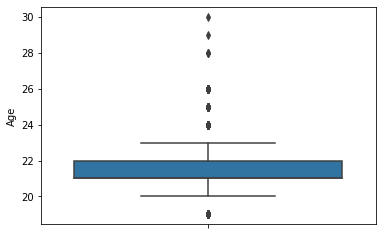

In [9]:
sns.boxplot(y=df['Age'])
#There seems outlier in age but practically it may not be outlier 
# becasue an individual can study normally upto age of 30 years

In [10]:
df['PlacedOrNot'].value_counts()

1    659
0    478
Name: PlacedOrNot, dtype: int64

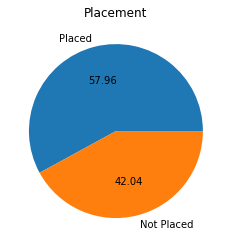

57% of the students (659) have been placed, 42% of the students(478) were not placed.


In [11]:
plt.pie(labels=['Placed','Not Placed'], x=df['PlacedOrNot'].value_counts().values,autopct='%0.2f')
plt.title('Placement')
plt.show()

print('57% of the students (659) have been placed, 42% of the students(478) were not placed.')

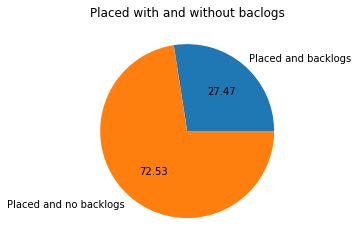

There are 72% students placed without backlogs and 27% placed with backlog history


In [12]:
a=len(df[(df['PlacedOrNot']==1) & (df['HistoryOfBacklogs']==1)])
b=len(df[(df['PlacedOrNot']==1) & (df['HistoryOfBacklogs']==0)])
c=len(df[(df['PlacedOrNot']==1)])

plt.pie(labels=['Placed and backlogs','Placed and no backlogs'], 
       x=[a,b],autopct='%0.2f')
plt.title('Placed with and without baclogs')
plt.show()

print('''There are 72% students placed without backlogs and 27% placed with backlog history''')

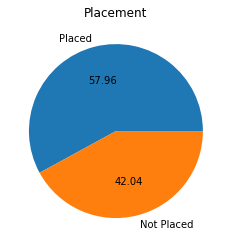

 %of the students have been placed, % of the students were not placed.


In [13]:
# print(df['PlacedOrNot'].value_counts())
plt.pie(labels=['Placed','Not Placed'], x=df['PlacedOrNot'].value_counts().values,autopct='%0.2f')
plt.title('Placement')
plt.show()

print(' %of the students have been placed, % of the students were not placed.')

156
322
478


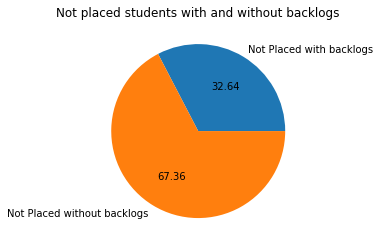

There are 478 students not placed out of which 156 students are not placed and 
are not having backlogs also whereas 322 students have not been placed and have no backlogs.
-----
As its clear that out 0f 478 students who are not placed, 1059 students have no backlogs
means backlog isn't the only criteria for placement.


In [14]:
print(len(df[(df['PlacedOrNot']==0) & (df['HistoryOfBacklogs']==1)]))
print(len(df[(df['PlacedOrNot']==0) & (df['HistoryOfBacklogs']==0)]))
print(len(df[(df['PlacedOrNot']==0)]))

plt.pie(labels=['Not Placed with backlogs','Not Placed without backlogs'], 
        x=[156,322],autopct='%0.2f')
plt.title('Not placed students with and without backlogs')
plt.show()

print('''There are 478 students not placed out of which 156 students are not placed and 
are not having backlogs also whereas 322 students have not been placed and have no backlogs.''')
print("-----")
print("""As its clear that out 0f 478 students who are not placed, 1059 students have no backlogs
means backlog isn't the only criteria for placement.""")

In [15]:
x=df[(df['PlacedOrNot']==0) & (df['HistoryOfBacklogs']==0) ]
x

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
5,22,Male,Electronics And Communication,0,6,0,0,0
7,21,Male,Information Technology,1,7,0,0,0
9,21,Female,Computer Science,1,6,1,0,0
10,22,Male,Computer Science,1,7,0,0,0
16,22,Female,Computer Science,1,7,1,0,0
...,...,...,...,...,...,...,...,...
2911,23,Male,Information Technology,1,6,1,0,0
2921,23,Male,Information Technology,0,6,0,0,0
2929,23,Female,Computer Science,0,6,1,0,0
2937,23,Male,Mechanical,0,6,0,0,0


In [18]:
x['CGPA'].value_counts()

7    153
6    112
5     57
Name: CGPA, dtype: int64

7    153
6    112
5     57
Name: CGPA, dtype: int64


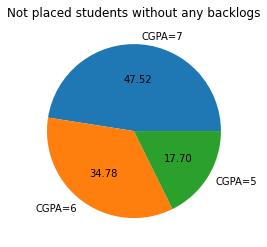

There are 300+ students who are not having backlog and not placed because all of them are having CGPA<=7
so CGPA is a significant criteria for placements.


In [20]:
x=df[(df['PlacedOrNot']==0) & (df['HistoryOfBacklogs']==0) ]
print(x['CGPA'].value_counts())

plt.pie(labels=['CGPA=7','CGPA=6', 'CGPA=5'], 
        x=x['CGPA'].value_counts().values,autopct='%0.2f')
plt.title('Not placed students without any backlogs')
plt.show()

print('''There are 300+ students who are not having backlog and not placed because all of them are having CGPA<=7
so CGPA is a significant criteria for placements.''')

In [21]:
print('Students placed with CGPA>7 are', len(df[(df['CGPA']>7) & (df['PlacedOrNot']==1) ]) )

print('Students not placed with CGPA>7 are', len(df[(df['CGPA']>7) & (df['PlacedOrNot']==0) ]) )

print('Students placed with CGPA>7 and having backlogs are', 
      len(df[(df['CGPA']>7) & (df['PlacedOrNot']==1) & (df['HistoryOfBacklogs']==1)]) )
print('---')
print('''There is an observation that the students securing CGPA>7 
are all placed irrespective of their backlog status.''')

Students placed with CGPA>7 are 367
Students not placed with CGPA>7 are 0
Students placed with CGPA>7 and having backlogs are 115
---
There is an observation that the students securing CGPA>7 
are all placed irrespective of their backlog status.


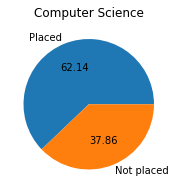

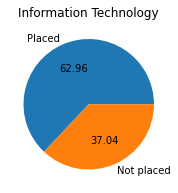

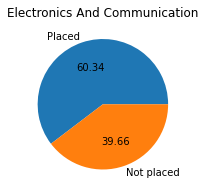

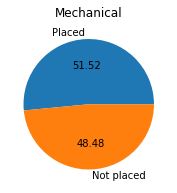

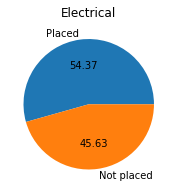

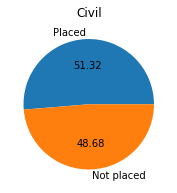

Highest percent placed students are for IT (62.9%) followed by 
CSE (62.14%) and least placed students are for Civil (51.32%).


In [22]:
c=df['Stream'].value_counts().index
for i in range(len(c)):
    b=df.groupby(by='Stream')
    y=b.get_group(c[i])['PlacedOrNot'].value_counts()
    plt.figure(figsize=(3,3))
    plt.plot(i)
    plt.pie(labels=['Placed','Not placed'],x=y.values,autopct='%.2f')
    plt.title(f'{c[i]}')
    plt.show()

print('''Highest percent placed students are for IT (62.9%) followed by 
CSE (62.14%) and least placed students are for Civil (51.32%).''')

In [23]:
b.get_group('Computer Science')['PlacedOrNot'].value_counts()

1    151
0     92
Name: PlacedOrNot, dtype: int64

The number of students total placed are 659 out of which 427 students are placed
      who have done internship whereas 232 students are placed without doing any internships


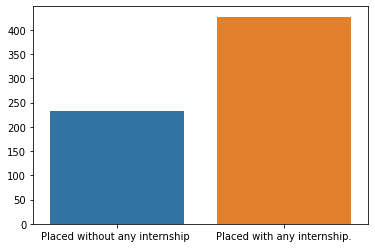

In [24]:
a=len(df[(df['Internships']==0) & (df['PlacedOrNot']==1)])
b=len(df[(df['Internships']>0) & (df['PlacedOrNot']==1)])
c=len(df[df['PlacedOrNot']==1])

print(f"""The number of students total placed are {c} out of which {b} students are placed
      who have done internship whereas {a} students are placed without doing any internships""")

sns.barplot(y=[a,b],x=['Placed without any internship ', 'Placed with any internship.'])
plt.show()

In [25]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [26]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


<Axes: >

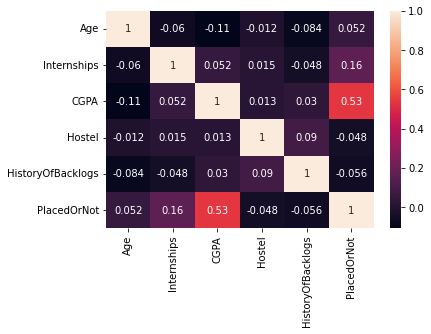

In [27]:
sns.heatmap(data=df.corr(),annot=True)

In [28]:
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Stream']
# Encode labels of object dtype multiple columns at once 
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [29]:
x = df.drop('PlacedOrNot',axis=1).values     #creating the independent variables
y = df['PlacedOrNot'].values                 # target variables

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
#Scaling the independent variables

from sklearn.preprocessing import StandardScaler
standard_Scaler=StandardScaler()
x_train = standard_Scaler.fit_transform(x_train)   #fit generates the parameters, transform applies 
x_test = standard_Scaler.transform(x_test)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


log_reg=LogisticRegression(random_state=10)
log_reg.fit(x_train,y_train)
y_pred_test=log_reg.predict(x_test)
y_pred_train=log_reg.predict(x_train)

print('Report for test data')
print(metrics.classification_report(y_test,y_pred_test))

print('Report for train data')
print(metrics.classification_report(y_train,y_pred_train))

Report for test data
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       100
           1       0.71      0.78      0.74       128

    accuracy                           0.70       228
   macro avg       0.69      0.69      0.69       228
weighted avg       0.70      0.70      0.69       228

Report for train data
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       378
           1       0.76      0.79      0.77       531

    accuracy                           0.73       909
   macro avg       0.72      0.72      0.72       909
weighted avg       0.73      0.73      0.73       909



In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

fit_dt = DecisionTreeClassifier(random_state=17)

param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

cv_dt = GridSearchCV(fit_dt, cv = 15,
                     param_grid=param_dist)

cv_dt.fit(x_train, y_train)

print(cv_dt.best_score_)

y_pred=cv_dt.predict(x_test)

accuracy_score = accuracy_score(y_test,y_pred)
print('Accuracy Score for model for test data is: ',accuracy_score)

0.8351001821493627
Accuracy Score for model for test data is:  0.8026315789473685


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       100
           1       0.90      0.73      0.81       128

    accuracy                           0.80       228
   macro avg       0.81      0.81      0.80       228
weighted avg       0.82      0.80      0.80       228



In [51]:
y_pred_train=cv_dt.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       378
           1       0.97      0.75      0.85       531

    accuracy                           0.84       909
   macro avg       0.85      0.86      0.84       909
weighted avg       0.87      0.84      0.84       909



In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor

fit_rf = RandomForestClassifier(random_state=3)

In [56]:
# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4,6,8],
              'max_features': ['auto', 'sqrt'],
              'criterion': ['gini', 'entropy'],
             'oob_score' : [True, False],
             'n_estimators':[10,15,20,25,30]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv =5,
                     param_grid=param_dist)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)   #to get best Hyperparameters

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 25, 'oob_score': True}


In [59]:
y_pred = cv_rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       100
           1       0.83      0.77      0.80       128

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.79      0.78      0.78       228



In [60]:
y_pred_train=cv_rf.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       378
           1       0.95      0.78      0.85       531

    accuracy                           0.84       909
   macro avg       0.85      0.86      0.84       909
weighted avg       0.86      0.84      0.84       909



In [61]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)
y_test_predict = classifier.predict(x_test)
y_train_predict = classifier.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       100
           1       0.75      0.78      0.77       128

    accuracy                           0.73       228
   macro avg       0.73      0.73      0.73       228
weighted avg       0.73      0.73      0.73       228

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       378
           1       0.79      0.79      0.79       531

    accuracy                           0.76       909
   macro avg       0.75      0.75      0.75       909
weighted avg       0.76      0.76      0.76       909



In [62]:
# K nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

error = []

# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=5)
    error.append(1-score.mean())
    
# k = 1, accuracy rate = 0.3
# k = 2, accuracy rate = .7

Text(0, 0.5, 'Accuracy Rate')

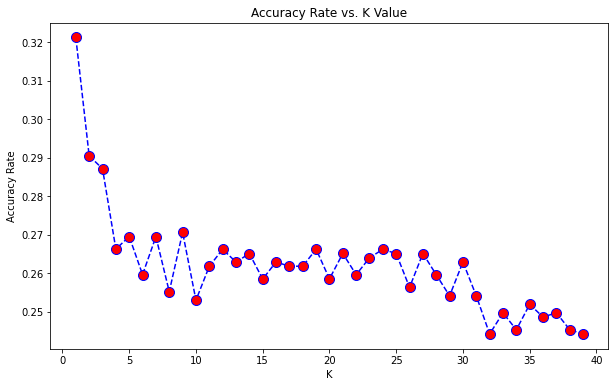

In [63]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [66]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[72 28]
 [30 98]]


              precision    recall  f1-score   support

           0       0.71      0.72      0.71       100
           1       0.78      0.77      0.77       128

    accuracy                           0.75       228
   macro avg       0.74      0.74      0.74       228
weighted avg       0.75      0.75      0.75       228



In [67]:
#SVM

tuned_parameter = {'C': [0.1, 1, 10, 100, 1000],        
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  
              'kernel': ['linear','rbf','ploy']}

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC(random_state = 5)
model_svm = GridSearchCV(svc,tuned_parameter,cv=5)
model_svm.fit(x_train,y_train)
print(model_svm.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [69]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C=1,gamma=0.1,random_state = 5)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71       100
           1       0.78      0.75      0.76       128

    accuracy                           0.74       228
   macro avg       0.74      0.74      0.74       228
weighted avg       0.74      0.74      0.74       228



In [72]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(cv_dt,x,y,cv=15)
scores.mean()

0.8241988304093567

In [83]:
param_dist = {'max_depth': [2, 3, 4,6,8,10],
              'max_features': ['auto', 'sqrt'],
             'n_estimators':[10,15,20,25,30]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv =10,
                     param_grid=param_dist)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)   #to get best Hyperparameters

Best Parameters using grid search: 
 {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 15}


In [84]:
y_pred1 = cv_rf.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       100
           1       0.84      0.77      0.80       128

    accuracy                           0.79       228
   macro avg       0.79      0.79      0.79       228
weighted avg       0.80      0.79      0.79       228



In [85]:
y_pred_train = cv_rf.predict(x_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83       378
           1       0.94      0.77      0.85       531

    accuracy                           0.84       909
   macro avg       0.84      0.85      0.84       909
weighted avg       0.86      0.84      0.84       909



In [96]:
from sklearn.model_selection import RandomizedSearchCV

fit_dt = DecisionTreeClassifier(random_state=17)

param_dist = {'max_depth': [2, 3, 4,5,6,7,8],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,16,18]}

cv_dt = RandomizedSearchCV(fit_dt, cv = 20,
                     param_distributions=param_dist)

cv_dt.fit(x_train, y_train)

print(cv_dt.best_score_)

y_pred=cv_dt.predict(x_test)

print(classification_report(y_test,y_pred))

0.8361352657004831
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       100
           1       0.90      0.73      0.81       128

    accuracy                           0.80       228
   macro avg       0.81      0.81      0.80       228
weighted avg       0.82      0.80      0.80       228



In [95]:
cv_dt.best_params_

{'max_leaf_nodes': 12, 'max_depth': 5, 'criterion': 'gini'}